In [2]:
%pylab inline
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from scipy import stats

%pylab is deprecated, use %matplotlib inline and import the required libraries.
Populating the interactive namespace from numpy and matplotlib


In [3]:
data = pd.read_csv('data/qualifying.csv')

data.head()

,grid,driver,constructor,season,round,qual_time,q_delta
0,1,Valtteri Bottas BOT,Mercedes,2020,1,62.939,0.000
1,2,Max Verstappen VER,Red Bull Racing Honda,2020,1,63.477,0.538
2,3,Lando Norris NOR,McLaren Renault,2020,1,63.626,0.687
3,4,Alexander Albon ALB,Red Bull Racing Honda,2020,1,63.868,0.929
4,5,Lewis Hamilton HAM,Mercedes,2020,1,62.951,0.012


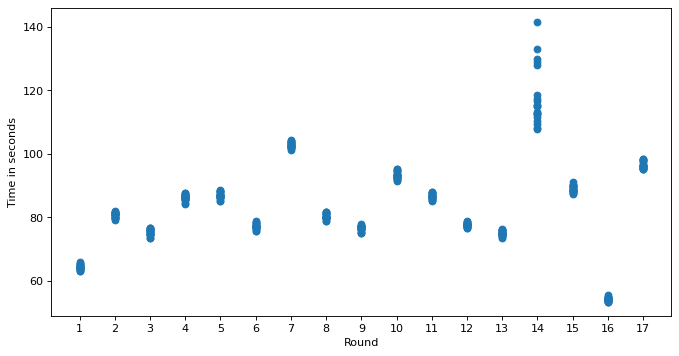

In [3]:
s_2020 = data.query('season == 2020')
q_times_by_round = s_2020.groupby('round').agg('qual_time')

x = s_2020['round'].values
y = s_2020['qual_time'].values

fig, axs = plt.subplots(1, dpi=80)
fig.set_size_inches(10, 5)

axs.set_title('')
axs.set_xlabel('Round')
axs.set_ylabel('Time in seconds')
axs.set_xticks(np.unique(x))
axs.scatter(x, y)

/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/numpy/core/fromnumeric.py:3432: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/numpy/core/_methods.py:190: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/numpy/core/_methods.py:265: RuntimeWarning: Degrees of freedom <= 0 for slice
  ret = _var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/numpy/core/_methods.py:223: RuntimeWarning: invalid value encountered in divide
  arrmean = um.true_divide(arrmean, div, out=arrmean, casting='unsafe',
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/numpy/core/_methods.py:257: RuntimeWarning: invalid value encount

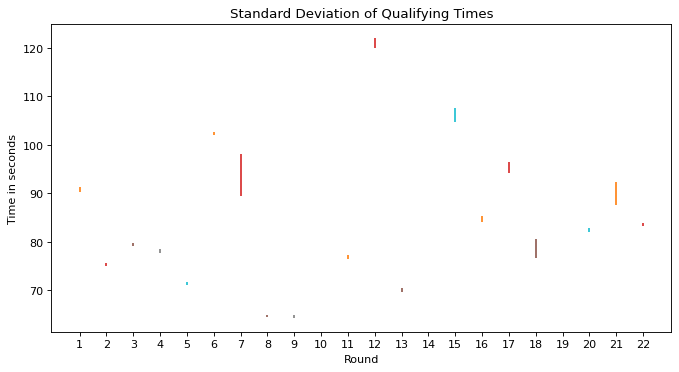

In [18]:
s21 = data.query('season == 2021')

fig, axs = plt.subplots(1, dpi=80)
fig.set_size_inches(10, 5)

axs.set_title('Standard Deviation of Qualifying Times')
axs.set_xlabel('Round')
axs.set_ylabel('Time in seconds')
axs.set_xticks(np.unique(s21['round']))

for i in range(1, len(np.unique(s21['round'])) + 1):
    r = s21.query('round == @i & qual_time.notnull()')['qual_time'].values
    mean = np.mean(r)
    err = 1.96 * np.std(r)/np.sqrt(len(r))

    axs.plot(i, mean)
    axs.errorbar(i, mean, err)

In [17]:
data_m = pd.read_csv('data/merged.csv')

pole_sitters = data_m.query('grid == 1')
pole_winners = pole_sitters.query('podium == 1')
pole_conversion = round((len(pole_winners)/ len(pole_sitters)) * 100, 1)
print(f'Pole conversion: {pole_conversion}%')

Pole conversion: 58.3%
